# Business Understanding

With changing market conditions and new pricing schemes, SyriaTel lost subscribers to competition. SyriaTel wants to know why subcribers churn. 

In [101]:
# Import libraries used in the notebook
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model

# Data Understanding
Dataset selected comes from Kaggle at https://www.kaggle.com/becksddf/churn-in-telecoms-dataset. I will explore the data, understand, before creating the dataset to use when building Machine Learning models.

In [102]:
# Read dataset into a dataframe
df = pd.read_csv('../data/churn_data.csv')
print("Data contains {} observations and {} features".format(df.shape[0], df.shape[1]))
print("Features: ", df.columns)

Data contains 3333 observations and 21 features
Features:  Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [103]:
'''
    Column 'Churn' is the label field, predicted feature, dependent feature
'''

"\n    Column 'Churn' is the label field, predicted feature, dependent feature\n"

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [105]:
df.isnull().sum().any()
'''
    No null values in any columns.
'''

'\n    No null values in any columns.\n'

<AxesSubplot:>

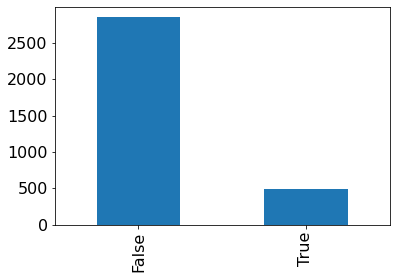

In [108]:
df['churn'].value_counts().plot(kind='bar')

<ipython-input-109-5a9c48f20f59>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


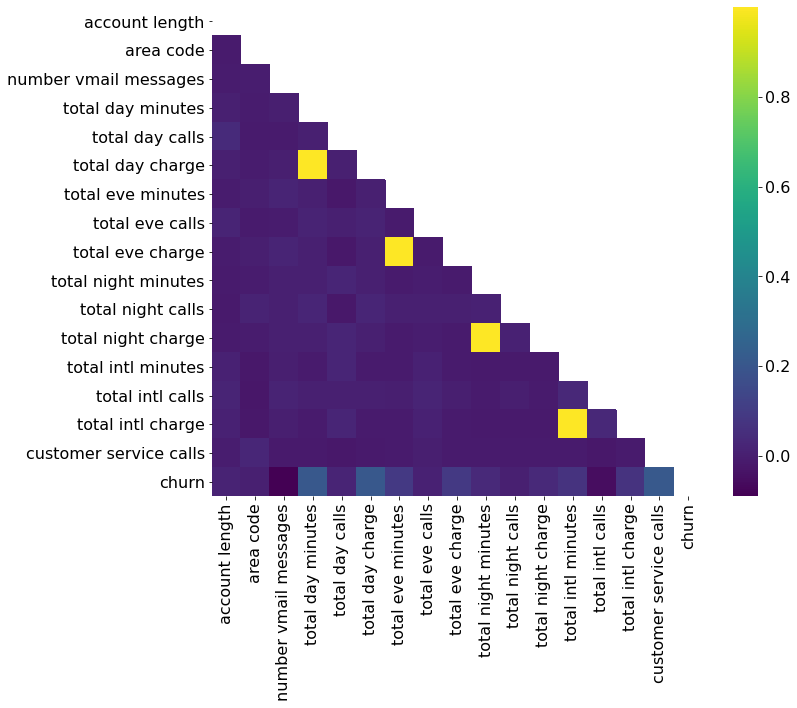

In [109]:
# using heat map to show the correlation between columns and churn
corr = df.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

# Data Preparation

The data preparation phase covers all activities to construct the final dataset from the initial raw data.

In [110]:
# Create indendent and dependet series. 
# 'churn' is target data and rest training data
X = df.drop('churn', axis=1)
y = df['churn']

from sklearn.model_selection import train_test_split

# Let us do a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



# Data Preprocessing

In [111]:
df.select_dtypes(include=['object', 'category'])
df.columns    

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [112]:
df.drop(['phone number'], inplace=True, axis=1)

# Descriptive Analysis

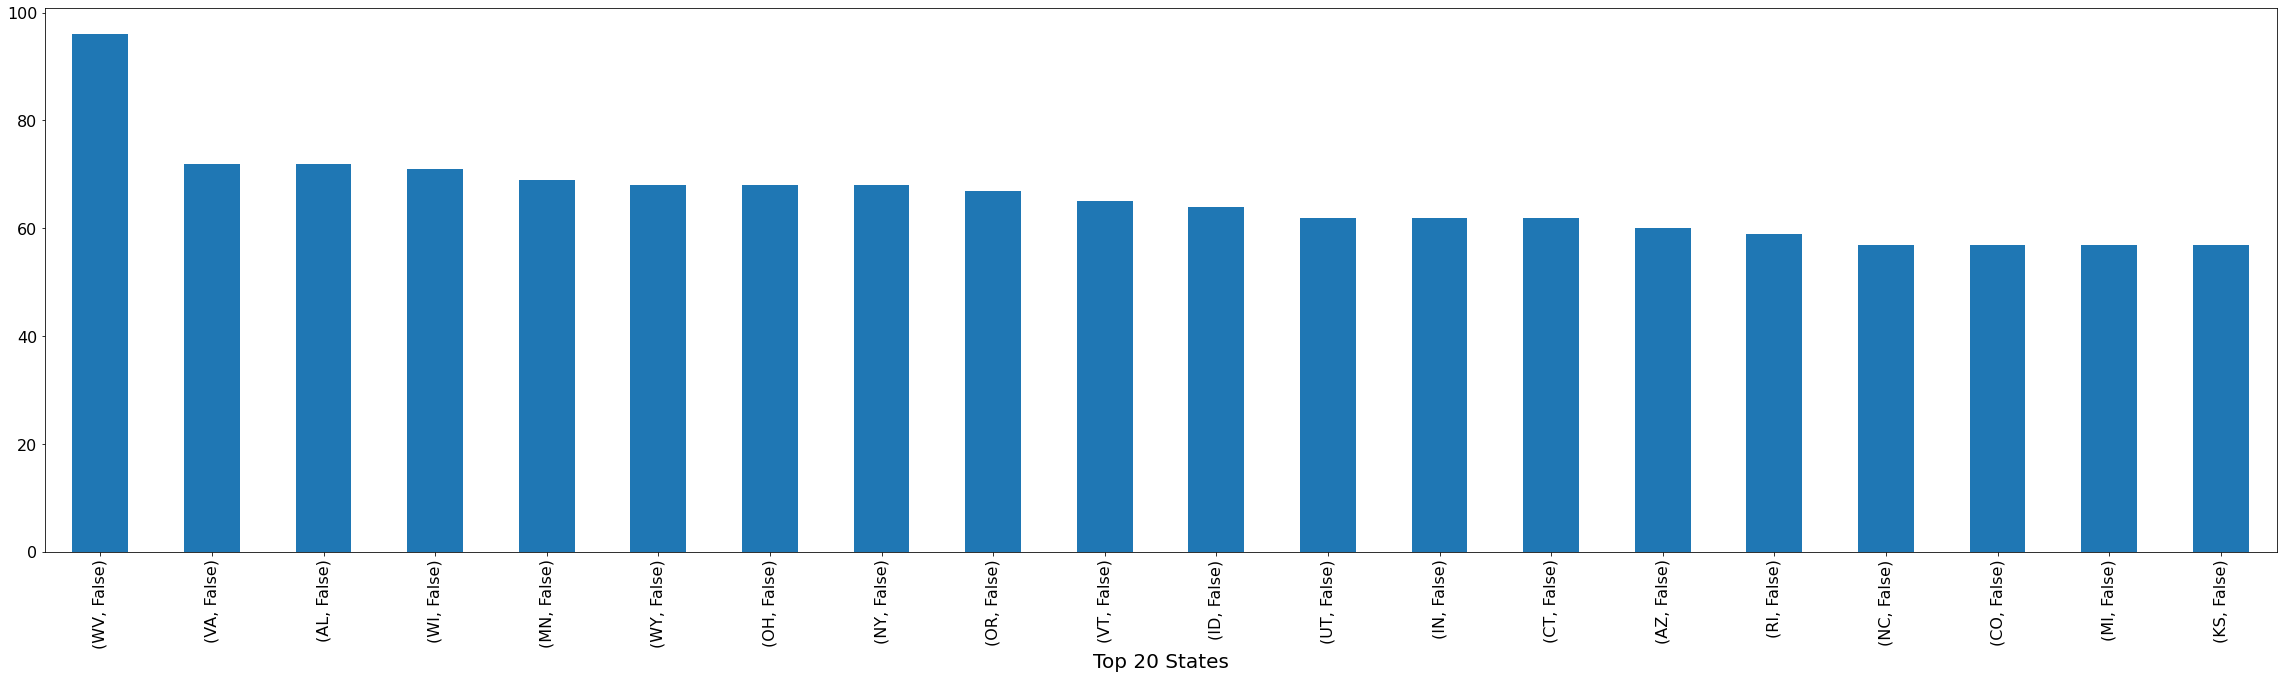

In [113]:
# Churn by State

plt.rcParams['font.size'] = '16'
df.groupby(["state", "churn"]).size().sort_values(ascending=False ).head(20).plot(kind='bar', stacked=False, figsize=(40, 10))
plt.xlabel('Top 20 States', fontsize=20)
plt.show()

# Handle categorical features

In [114]:
# Encode categorical features state, 'international plan', and 'voicemail plan'
label_encoder = preprocessing.LabelEncoder()

df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

# drop column 'churn'
df.drop(['churn'], inplace=True, axis=1)

In [115]:
X = df.to_numpy().astype(np.float)
X.shape, X

scaler = preprocessing.StandardScaler()

X = scaler.fit_transform(X)

<ipython-input-115-ffcde99cfb5a>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = df.to_numpy().astype(np.float)
